<a href="https://colab.research.google.com/github/1-oh/MachineLearning2021/blob/Homework3/18_%E6%95%B0%E6%8D%AE%E5%A2%9E%E5%BC%BA%EF%BC%9Atorchvision_transforms_%E5%B8%B8%E7%94%A8%E6%96%B9%E6%B3%95%E6%BC%94%E7%A4%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数据增强：torchvision.transforms 常用方法演示

> 引导文章：[e. 数据增强：torchvision.transforms 常用方法解析](https://github.com/Hoper-J/AI-Guide-and-Demos-zh_CN/blob/master/Guide/e.%20数据增强：torchvision.transforms%20常用方法解析.md)

注意，本代码文件修改自[官方文档](https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-download-auto-examples-transforms-plot-transforms-illustrations-py)。


## 环境配置


In [1]:
!pip install pillow            # 图像处理
!pip install matplotlib        # 绘图
!pip install numpy             # 数组和矩阵操作
# !pip install torch torchvision # 默认已正确安装

In [2]:
%matplotlib inline

## 下载用于演示的图片

In [3]:
!wget https://github.com/Hoper-J/AI-Guide-and-Demos-zh_CN/raw/master/Guide/assets/astronaut.jpg
!mkdir -p assets
!mv astronaut.jpg assets

--2025-05-05 06:38:04--  https://github.com/Hoper-J/AI-Guide-and-Demos-zh_CN/raw/master/Guide/assets/astronaut.jpg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hoper-J/AI-Guide-and-Demos-zh_CN/master/Guide/assets/astronaut.jpg [following]
--2025-05-05 06:38:05--  https://raw.githubusercontent.com/Hoper-J/AI-Guide-and-Demos-zh_CN/master/Guide/assets/astronaut.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37996 (37K) [image/jpeg]
Saving to: ‘astronaut.jpg’

astronaut.jpg       100%[===================>]  37.11K  --.-KB/s    in 0.05s   

2025-05-05 06:38:05 (794 KB/s) - ‘astronaut.jpg’ s

## 定义绘图函数



In [4]:
from PIL import Image                # Image 处理图像
from pathlib import Path            # Path 处理文件路径
import matplotlib.pyplot as plt        # 绘图
import numpy as np                    # 处理数组和矩阵

import torch                        # pytorch 深度学习
import torchvision.transforms as T    # torchvision.transforms 用于对图像进行各种变换

# 设置一些绘图参数，savefig.bbox 用于控制图像保存时的边框大小
plt.rcParams["savefig.bbox"] = 'tight'

# 打开 assets/astronaut.jpg 路径下的图像文件，并将其赋值给 orig_img 变量
orig_img = Image.open(Path('assets') / 'astronaut.jpg')

# 设置随机数种子以复现结果
torch.manual_seed(0)

# 定义绘图函数
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    # 判断 imgs 是否是一个二维列表，如果不是，则将其转换为二维列表
    if not isinstance(imgs[0], list):
        imgs = [imgs]

    # 根据 with_orig 参数确定网格的列数
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig

    # 创建对应数量的子图
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)

    # 遍历每一行和每一列的图像，使用 ax.imshow 将其显示在对应的子图上，并使用 ax.set 去掉坐标轴和刻度
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    # 如果 with_orig 为真，则在第一列的子图上设置标题为 Original image
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)

    # 如果 row_title 不为空，则在每行的第一列的子图上设置标签为 row_title 中对应的元素
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    # 调整子图之间的间距
    plt.tight_layout()

## Compose 提前看

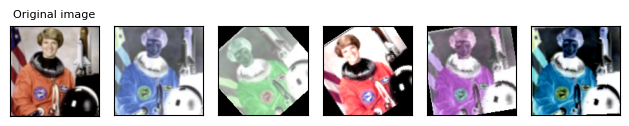

In [5]:
compose = T.Compose([
    # 将图像缩放到固定的形状（高度=宽度=128）
    T.Resize((128, 128)),
    # 对图像应用高斯模糊，核大小为3，标准差为0.1
    T.GaussianBlur(3, 0.1),
    # 随机地改变图像的亮度和色调。亮度因子从[0.5, 1.5]之间均匀地选择，色调因子从[-0.3, 0.3]之间均匀地选择。
    T.ColorJitter(brightness=0.5, hue=0.3),
    # 随机反转图像，概率为0.5
    T.RandomInvert(p=0.5),
    # 随机应用一个变换列表，概率为0.6。
    # 这里变换列表中只有一个变换，就是随机旋转图像，角度为0到60度之间
    T.RandomApply(transforms=[T.RandomRotation(degrees=(0, 60))], p=0.6),
])
demo = [compose(orig_img) for i in range(5)]
plot(demo)

## Pad 填充

> torchvision.transforms.Pad(*padding*, *fill=0*, *padding_mode='constant'*)
>
> - **padding** (*int* *or* *sequence*) - 如果是 int，则表示在图像的上下左右都填充相同的像素数，如果是一个长度为 2 的 sequence，则表示在左右和上下分别填充不同的像素数，如果是一个长度为4的 sequence，则表示在左、上、右、下分别填充不同的像素数
>
> - **fill** (*number* *or* *tuple*) - 表示填充时使用的像素值，如果是一个长度为3的 tuple，则表示分别用于填充 R、G、B 通道的值，这个参数只在 padding_mode 为 constant 时有效，默认是 0。Tensor 只支持 number，PIL 图像只支持 int 和 tuple。
>
>  - **padding_mode** (*str*) - 表示填充时使用的模式，可以选择 constant, edge, reflect 或 symmetric 四种模式，默认是 constant。
>
>    - constant: 用 fill 参数指定的值进行填充，常用于填充边框等需要指定固定填充值的场景。
>    - edge: 用图像边缘的值进行填充，常用于对图像进行缩放等操作时，为了保持原始图像的边缘特征，需要使用最靠近边缘的像素进行填充。
>    - reflect: 用图像反射的值进行填充，不重复边缘值，将边缘的像素沿边缘轴进行翻转，然后使用翻转后的像素进行填充。常用于对图像进行卷积等操作时，为了使卷积后的图像大小与原始图像相同，需要在边缘进行填充。反射填充能够避免填充像素与原始像素的不连续性，使得填充后的图像更加平滑。
>    - symmetric: 用图像对称的值进行填充，和 reflect 类似，重复边缘值。
>     以一个简单的例子来说明这些不同的填充模式。假设需要在一个3x3的图像的边缘填充一个宽度为1的边框，填充像素的值为255（白色）：
>
>    ```css
>         原始图像：
>         [ 1,  2,  3]
>         [ 4,  5,  6]
>         [ 7,  8,  9]
>    
>         填充模式为"constant"：
>         [255,255,255,255,255]
>         [255, 1,  2,  3,255]
>         [255, 4,  5,  6,255]
>         [255, 7,  8,  9,255]
>         [255,255,255,255,255]
>    
>         填充模式为"edge"：
>         [ 1,  1,  2,  3,  3]
>         [ 1,  1,  2,  3,  3]
>         [ 4,  4,  5,  6,  6]
>         [ 7,  7,  8,  9,  9]
>         [ 7,  7,  8,  9,  9]
>    
>         填充模式为"reflect"：
>         [ 5,  4,  5,  6,  5]
>         [ 2,  1,  2,  3,  2]
>         [ 5,  4,  5,  6,  5]
>         [ 8,  7,  8,  9,  8]
>         [ 5,  4,  5,  6,  5]
>    
>         填充模式为"symmetric"：
>         [ 1,  1,  2,  3,  3]
>         [ 1,  1,  2,  3,  3]
>         [ 4,  4,  5,  6,  6]
>         [ 7,  7,  8,  9,  9]
>         [ 7,  7,  8,  9,  9]   
>    ```


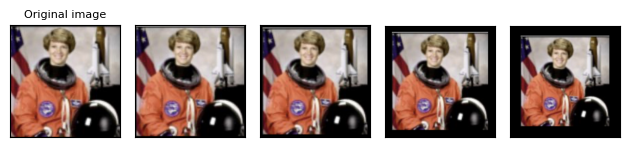

In [ ]:
# padding 表示要填充在图像边界的像素数
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

## Resize 缩放

> torchvision.transforms.Resize(size, interpolation=InterpolationMode.BILINEAR, max_size=None, antialias='warn')
> - **size** (*sequence* *or* *int*) -  如果是一个 sequence: [h, w]，则表示将图像缩放到该尺寸，不保持原始图像的宽高比。如果是 int，表示将图像的较小边的长度将设置为这个数值，同时保持原始的宽高比，在 size 类型为 int 的情况下，如果图像的 height > width，则最终会被缩放到 (size * height / width, size)。
> - **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.BILINEAR`，即双线性插值。如果输入是 Tensor，那么 interpolation 只可以取以下四个值：
>
>   - `InterpolationMode.BILINEAR`：双线性插值法，在两个方向上分别进行线性插值，然后再进行组合。对应于 `PIL.Image.BILINEAR`。
>   - `InterpolationMode.NEAREST`: 最近邻插值法，选择最接近的像素作为输出像素的值。
>   - `InterpolationMode.NEAREST_EXACT`: 最近邻插值法，但是使用更精确的算法，与 Scikit-Image 和 PIL 的算法一致，修复了 InterpolationMode.NEAREST 的已知问题。对应于`PIL.Image.NEAREST`。
>   - `InterpolationMode.BICUBIC`：双三次插值法，在两个方向上分别进行三次插值，然后再进行组合。对应于`PIL.Image.BICUBIC`
> - **max_size** (*int*) - 表示调整后图像的最大边长。如果调整后的图像的较长边超过了 `max_size`，那么会再次调整图像，使得较长边等于这个 `max_size`。这可能会导致 `size` 参数被覆盖，即较短边可能会小于 `size` 参数。这个参数只在 `size` 是 int 时有效。
> - **antialias** (*bool*) - 表示是否应用抗锯齿。它只对 tensors 的 BILINEAR（双线性插值））或者 BICUBIC（双三次插值）有效，对其他情况无效：对于 PIL 图像，双线性或者双三次插值总是应用抗锯齿。对于其他模式（对于PIL图像和张量），抗锯齿没有意义，所以这个参数被忽略。可能的取值有：
>
>   - `True`: 对于双线性或者双三次插值，会应用抗锯齿。其他模式不受影响。这可能是你想要使用的取值。
>   - `False`: 对于 tensors 的任何**模式**（指的是 InterpolationMode），都不会应用抗锯齿。PIL 图像在双线性或者双三次插值时仍然会应用抗锯齿，因为PIL不支持不使用抗锯齿。
>   - `None`: 等价于 tensors: `False` 和 PIL: `True`。这个取值存在于旧版本中，除非你真的知道你在做什么，否则你可能不想使用它。
>
>   当前的默认值是 `None`，但是在 v0.17 中将更改为 `True`，以便 PIL 和 Tensor 后端保持一致。

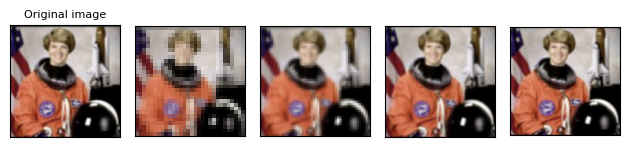

In [ ]:
# size 表示要调整到的尺寸
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

In [ ]:
print(orig_img.size)

(418, 424)


## CenterCrop 中心裁剪

> torchvision.transforms.CenterCrop(*size*)
>
> - **size** (*sequence* *or* *int*) - 输出的图像尺寸，如果是 int 而不是 sequence: (h, w)，那么图像的输出尺寸最终将是 (size, size)，如果 sequence 的长度是 1，那么将被解释为 (size[0], size[0])。

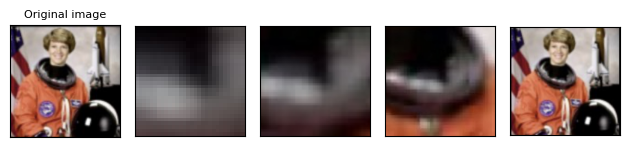

In [ ]:
# size 表示中心裁剪的尺寸
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

## FiveCrop 五个区域裁剪（四角 + 中心）

> torchvision.transforms.FiveCrop(*size*)
>
> - **size** (*sequence* *or* *int*) - 输出的图像尺寸，如果是 int 而不是 sequence: (h, w)，那么图像的输出尺寸最终将是 (size, size)，如果 sequence 的长度是 1，那么将被解释为 (size[0], size[0])。
>
> 函数的返回值是一个包含五张裁剪后的图像的 tuple（四角和中心）。

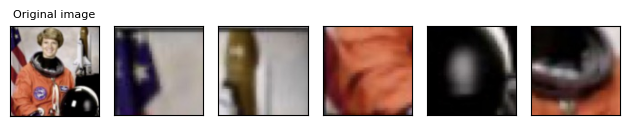

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

## GrayScale 灰度图像变换

> torchvision.transforms.Grayscale(*num_output_channels=1*)
>
> - **num_output_channels** (*int*) - 表示输出图像的通道数。可以是1或者3。如果是1，表示输出图像是单通道的灰度图像。如果是3，表示输出图像是三通道的灰度图像，其中r = g = b。默认是1。

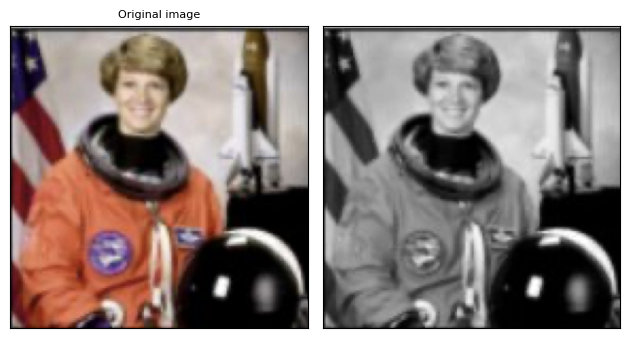

In [ ]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

## Random transforms 随机变化

下面的变换是随机的，这意味着同一个变换实例在每次变换时会产生不同的结果。

### ColorJitter 颜色扰动

用于随机改变图像的亮度、对比度、饱和度和色调



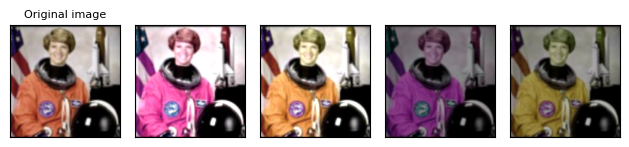

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur 高斯模糊处理

用于对图像进行高斯模糊

> torchvision.transforms.GaussianBlur(*kernel_size*, *sigma=(0.1, 2.0)*)
>
> - **kernel_size** (*int* *or* *sequence*) - 表示高斯核的大小，int -> (kernal_size, kernal_size)，sequence -> (kernal_size[0], kernal_size[1])
> - **sigma** (*float* *or* *tuple of python:float* *(**min**,* ***max**)*) - 高斯核的标准差。如果是 float，表示标准差是固定的。如果是一个列表，表示标准差会从给定的 [min, max] 中均匀选择。

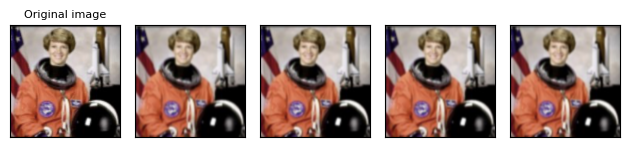

In [ ]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomPerspective 随机透视变换

> torchvision.transforms.RandomPerspective(*distortion_scale=0.5*, *p=0.5*, *interpolation=InterpolationMode.BILINEAR*, *fill=0*)
>
> - **distortion_scale** (*float*) - 透视变换的程度，越大则变形越明显。默认值为0.5。
> - **p** (*float*) - 控制变换发生的概率。默认值为0.5。
> - **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.BILINEAR`，即双线性插值。如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
> - **fill** (*sequence* *or* *number*) - 填充值，可以是 sequence（对应不同通道的值），或者 int或float（对应所有通道相同的值）。默认值为 `0`。

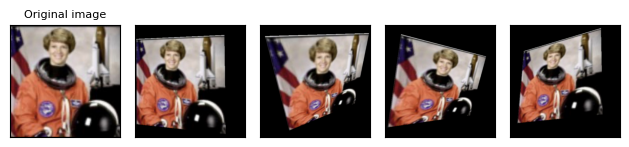

In [ ]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation 随机旋转

> torchvision.transforms.RandomRotation(*degrees*, *interpolation=InterpolationMode.NEAREST*, *expand=False*, *center=None*, *fill=0*)
>
> - **degrees** (*sequence* *or* *number*) - 旋转角度的范围，可以是 sequence（如(min, max)），或者 int或float（如d，则范围为(-d, d)）。
> - **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
> - **expand** (*bool*, *optional*) - 是否扩展图像使其大到足够容纳整个旋转后的图像，以保持原始图像的所有像素，如果是 false，则图像 size 不变。默认值为False。
>   注意，expand 假设图像以中心旋转，不进行平移。
> - **center** (*sequence*, *optional*) - 旋转中心的位置，可以是一个序列（如(x, y)，原点为左上角），或者None（图像中心）。默认值为None。
> - **fill** (*sequence* *or* *number*) – 填充值，可以是 sequence（对应不同通道的值），或者 int或float（对应所有通道相同的值）。默认值为 `0`。

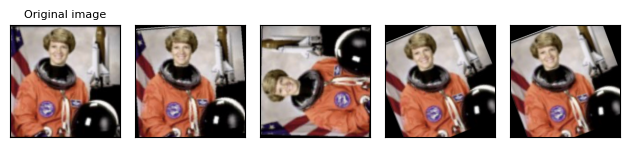

In [ ]:
# 随机旋转
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine 随机仿射变换

>torchvision.transforms.RandomAffine(*degrees*, *translate=None*, *scale=None*, *shear=None*, *interpolation=InterpolationMode.NEAREST*, *fill=0*, *center=None*)
>
>- **degrees** (*sequence* *or* *number*) – 旋转角度的范围，可以是 sequence（如(min, max)），或者 int或float（如d，则范围为(-d, d)），设置为 0 禁用旋转。
>- **translate** (*tuple*, *optional*) – 平移距离的范围，可以是 tuple（如(a, b)，表示水平平移在 -img_width * a < dx < img_width * a 间随机抽取，垂直平移在 -img_height * b < dy < img_height * b 间随机抽取，其中 a, b 分别是图像宽度和高度的比例），None 表示不平移。默认值为 None。
>- **scale** (*tuple*, *optional*) - 缩放因子的范围，(a, b) 表示在 a <= scale <= b 间随机抽取，None 表示不缩放。默认保存原始比例。
>- **shear** (*sequence* *or* *number*, *optional*) - 剪切角度的范围，如果是 int或float（如d，则范围为(-d, d)），如果是 sequence，根据 sequence 长度划分：如果 shear 是 2 个值的序列，则应用范围内平行于x轴的剪切(shear[0]，shear[1])，如果 shear 是 4 个值的序列，则应用 x轴(shear[0]，shear[1])，y轴(shear[2]，shear[3])，None 则表示不剪切。默认不剪切。
>- **interpolation** (*InterpolationMode*) – 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
>- **fill** (*sequence* *or* *number*) - 填充值，可以是 sequence（对应不同通道的值），或者 int或float（对应所有通道相同的值）。默认值为 `0`。
>- **center** (*sequence*, *optional*) – 旋转中心的位置，可以是一个序列（如(x, y)，原点为左上角），或者None（图像中心）。默认在图像中心。

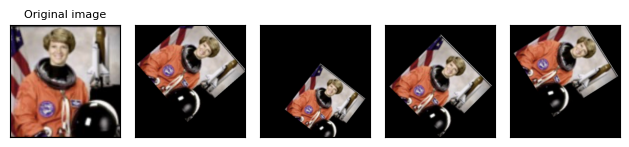

In [ ]:
# 随机仿射变换
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

### ElasticTransform 随机弹性变形

>torchvision.transforms.ElasticTransform(*alpha=50.0*, *sigma=5.0*, *interpolation=InterpolationMode.BILINEAR*, *fill=0*)
>
>- **alpha** (*float* *or* *sequence of python:floats*) - 变形的程度，越大则变形越明显，如果是float，表示在所有维度上使用相同的值，如果是tuple，表示在每个维度上使用不同的值。默认为50.0。
>- **sigma** (*float* *or* *sequence of python:floats*) – 高斯平滑的标准差，默认为 5.0.
>- **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.BILINEAR`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
>- **fill** (*sequence* *or* *number*) – 填充值，可以是 sequence（对应不同通道的值），或者 int或float（对应所有通道相同的值）。默认值为 `0`。

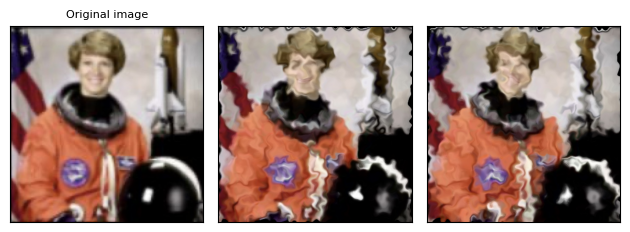

In [ ]:
# 在图像上添加一些小的扭曲
elastic_transformer = T.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot(transformed_imgs)

### RandomCrop 随机裁剪

>torchvision.transforms.RandomCrop(*size*, *padding=None*, *pad_if_needed=False*, *fill=0*, *padding_mode='constant'*)
>
>- **size** (*sequence* *or* *int*) - 输出的图像尺寸，如果是 int 而不是 sequence: (h, w)，那么图像的输出尺寸最终将是 (size, size)，如果 sequence 的长度是 1，那么将被解释为 (size[0], size[0])。
>
>- **padding** (*int* *or* *sequence*, *optional*) - 如果是 int，则表示在图像的上下左右都填充相同的像素数，如果是一个长度为 2 的 sequence，则表示在左右和上下分别填充不同的像素数，如果是一个长度为4的 sequence，则表示在左、上、右、下分别填充不同的像素数。默认为 None，不填充。
>
>- **pad_if_needed** (*boolean*) - 决定当图像小于裁剪大小时是否进行填充。如果为 True，则当图像小于裁剪大小时进行填充，以免引发异常，如果为 False，则当图像小于裁剪大小时不进行裁剪。默认值为 False。 Since cropping is done after padding, the padding seems to be done at a random offset.
>
>- **fill** (*number* *or* *tuple*) - 表示填充时使用的像素值，如果是一个长度为3的 tuple，则表示分别用于填充 R、G、B 通道的值，这个参数只在 padding_mode 为 constant 时有效，默认是 0。Tensor 只支持 number，PIL 图像只支持 int 和 tuple。
>
>- **padding_mode** (*str*) - 表示填充时使用的模式，可以选择 constant, edge, reflect 或 symmetric 四种模式，默认是 constant。相关信息见[Resize](#resize-缩放)。
>

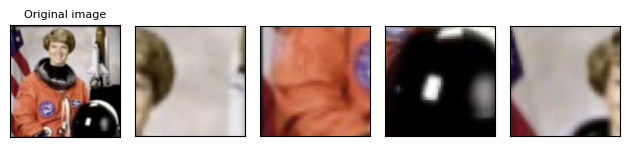

In [ ]:
# 随机裁剪
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop 随机缩放并裁剪

>torchvision.transforms.RandomResizedCrop(*size*, *scale=(0.08, 1.0)*, *ratio=(0.75,1.3333333333333333)*, *interpolation=InterpolationMode.BILINEAR*, *antialias:Optional[Union[str, bool]] = 'warn'*)
>
>- **size** (*int* *or* *sequence*) - 输出的图像尺寸，如果是 int 而不是 sequence: (h, w)，那么图像的输出尺寸最终将是 (size, size)，如果 sequence 的长度是 1，那么将被解释为 (size[0], size[0])。
>
>- **scale** (*tuple of python:float*) - 指定缩放前图像面积占原始面积的比例范围。默认值为(0.08, 1.0)。
>
>- **ratio** (*tuple of python:float*) - 缩放前图像宽高比例范围。默认值为(0.75, 1.3333333333333333)
>
>- **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.BILINEAR`，即双线性插值。如果输入是 Tensor，那么 interpolation 只可以取以下四个值：
>  - `InterpolationMode.BILINEAR`：双线性插值法，在两个方向上分别进行线性插值，然后再进行组合。对应于 `PIL.Image.BILINEAR`。
>  - `InterpolationMode.NEAREST`: 最近邻插值法，选择最接近的像素作为输出像素的值。
>  - `InterpolationMode.NEAREST_EXACT`: 最近邻插值法，但是使用更精确的算法，与 Scikit-Image 和 PIL 的算法一致，修复了 InterpolationMode.NEAREST 的已知问题。对应于`PIL.Image.NEAREST`。
>  - `InterpolationMode.BICUBIC`：双三次插值法，在两个方向上分别进行三次插值，然后再进行组合。对应于`PIL.Image.BICUBIC`
>
>- **antialias** (*bool**,* *optional*) - 表示是否应用抗锯齿。它只对 tensors 的 BILINEAR（双线性插值））或者 BICUBIC（双三次插值）有效，对其他情况无效：对于 PIL 图像，双线性或者双三次插值总是应用抗锯齿。对于其他模式（对于PIL图像和张量），抗锯齿没有意义，所以这个参数被忽略。可能的取值有：
>  - `True`: 对于双线性或者双三次插值，会应用抗锯齿。其他模式不受影响。这可能是你想要使用的取值。
>  - `False`: 对于 tensors 的任何**模式**（指的是 InterpolationMode），都不会应用抗锯齿。PIL 图像在双线性或者双三次插值时仍然会应用抗锯齿，因为PIL不支持不使用抗锯齿。
>  - `None`: 等价于 tensors: `False` 和 PIL: `True`。这个取值存在于旧版本中，除非你真的知道你在做什么，否则你可能不想使用它。
>
> 当前的默认值是 `None`，但是在 v0.17 中将更改为 `True`，以便 PIL 和 Tensor 后端保持一致。

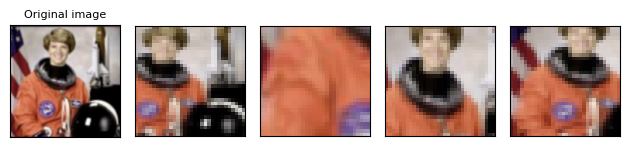

In [ ]:
# 随机缩放并裁剪
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

### RandomInvert 随机反色处理

>torchvision.transforms.RandomInvert(*p=0.5*)
>
>- **p** (*float*) - 图像颜色反转的概率，默认为 0.5。

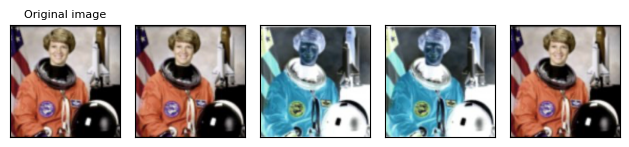

In [ ]:
# 以给定的概率随机地变换给定图像的颜色，默认为 0.5
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

### RandomPosterize 随机分层处理

>torchvision.transforms.RandomPosterize(*bits*, *p=0.5*)
>
>- **bits** (*int*) - 将每个通道的像素值减少到指定的位数，取值在 0-8 之间。
>- **p** (*float*) - 控制图像分层的概率，默认 0.5。

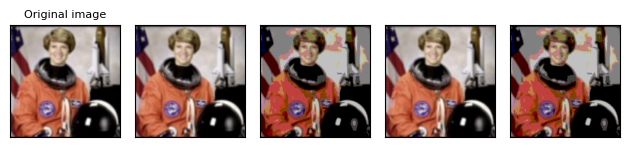

In [ ]:
# 对图像进行随机的色彩分层，各channel像素值的bits位数降为2
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

### RandomSolarize 随机像素值取反

>torchvision.transforms.RandomSolarize(*threshold*, *p=0.5*)
>
>- **threshold** (*float*) - 一个阈值，所有大于等于 threshold 的像素都会被反转。
>- **p** (*float*) - 图片被反转的概率，默认为 0.5。

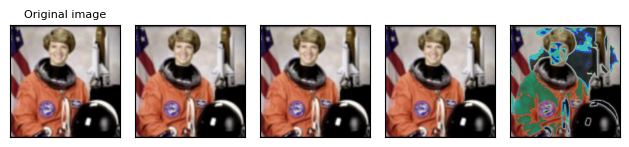

In [ ]:
# 图像有 0.5 的概率反转大于 192 的像素
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness 随机锐度调整

>torchvision.transforms.RandomAdjustSharpness(*sharpness_factor*, *p=0.5*)
>
>- **sharpness_factor** (*float*) - 指定调整多少锐度，0 给出一个模糊的图像，1 给出原始图像，而 2 将锐度提高了 2 倍。
>- **p** (*float*) - 图像被调整锐度的概率，默认为 0.5。

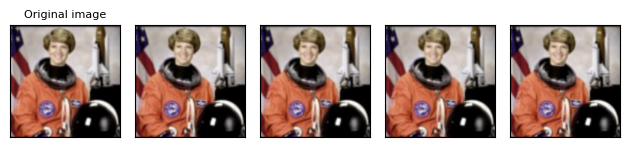

In [ ]:
# 图像有 0.5 的概率提升 2 倍锐度
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandomAutocontrast 随机对比度调整

>torchvision.transforms.RandomAutocontrast(*p=0.5*)
>
>- **p** (*float*) – 图像被自动调整对比度的概率，默认为 0.5。

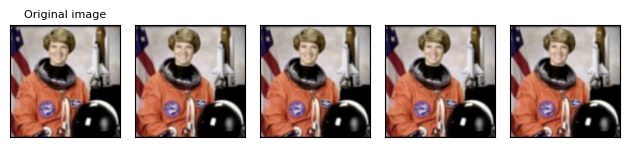

In [ ]:
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize 随机直方图平均化

>即将图像的像素值分布均匀化
>
>torchvision.transforms.RandomAutocontrast(*p=0.5*)
>
>- **p** (*float*) – 图像被均匀化的概率，默认为 0.5。

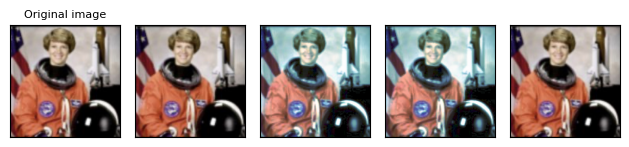

In [ ]:
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

### AutoAugment 自动增强

>可以自动使用一组预定义的数据增强策略对图像进行增强。
>
>torchvision.transforms.AutoAugment(*policy: [AutoAugmentPolicy](https://pytorch.org/vision/stable/generated/torchvision.transforms.AutoAugmentPolicy.html#torchvision.transforms.AutoAugmentPolicy) =AutoAugmentPolicy.IMAGENET*, *interpolation: InterpolationMode =InterpolationMode.NEAREST*, *fill: OptionalList[[float]] = None*)
>
>- **policy** ([*AutoAugmentPolicy*](https://pytorch.org/vision/stable/generated/torchvision.transforms.AutoAugmentPolicy.html#torchvision.transforms.AutoAugmentPolicy)) - 一个枚举类型，表示自动增强的策略。默认是`AutoAugmentPolicy.IMAGENET`，还可以选择其他预定义的策略，如 `AutoAugmentPolicy.CIFAR10` 或 `AutoAugmentPolicy.SVHN`。
>- **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
>- **fill** (*sequence* *or* *number*, *optional*) - 变换后图像边缘填充的像素值，如果给定 number，则应用于所有 channel。默认为 None，用0填充。

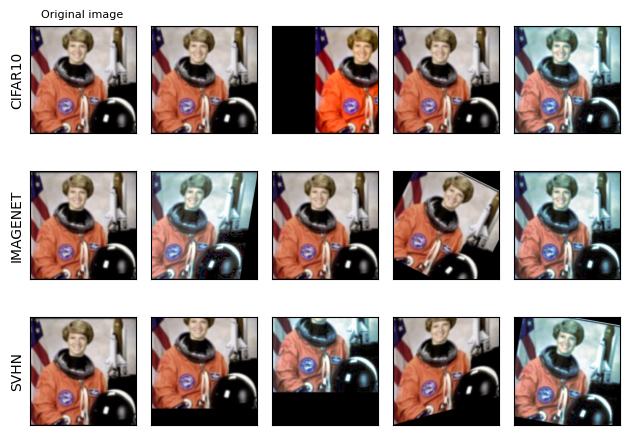

In [ ]:
# 自动图像增强
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

### RandAugment 随机增强

> 该方法基于这篇论文： [RandAugment: Practical automated data augmentation with a reduced search space](https://arxiv.org/abs/1909.13719).
>
> torchvision.transforms.RandAugment(*num_ops: int = 2*, *magnitude: int = 9*, *num_magnitude_bins: int = 31*, *interpolation: InterpolationMode =InterpolationMode.NEAREST*, *fill: Optional[List[float]] = None*)
>
> - **num_ops** (*int*) - 选择多少种随机变换。
> - **magnitude** (*int*) - 每种随机变换的强度。
> - **num_magnitude_bins** (*int*) - 不同强度值的数量。
> - **interpolation** (*InterpolationMode*) - 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
> - **fill** (*sequence* *or* *number**,* *optional*) – 变换后图像边缘填充的像素值，如果给定 number，则应用于所有 channel。默认为 None，用0填充。

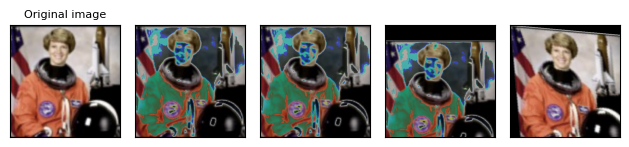

In [ ]:
augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### TrivialAugmentWide 简单数据增强

>该方法基于这篇论文：[TrivialAugment: Tuning-free Yet State-of-the-Art Data Augmentation](https://arxiv.org/abs/2103.10158)
>
>torchvision.transforms.TrivialAugmentWide(*num_magnitude_bins: int = 31*, *interpolation: InterpolationMode = InterpolationMode.NEAREST*, *fill:Optional[List[float]] = None*)
>
>- **num_magnitude_bins** (*int*) – 表示不同变换强度的数量，默认为 31。
>- **interpolation** (*InterpolationMode*) – 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
>- **fill** (*sequence* *or* *number**,* *optional*) –  变换后图像边缘填充的像素值，如果给定 number，则应用于所有 channel。默认为 None，用0填充。

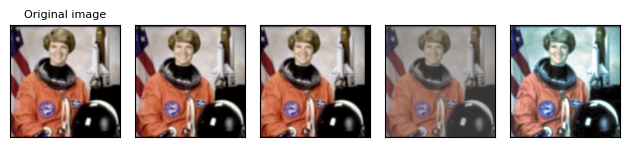

In [ ]:
augmenter = T.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### AugMix 混合增强

>该方法基于这篇论文：[AugMix: A Simple Data Processing Method to Improve Robustness and Uncertainty](https://arxiv.org/abs/1912.02781)
>
>torchvision.transforms.AugMix(*severity: int = 3*, *mixture_width: int = 3*, *chain_depth: int = - 1*, *alpha: float = 1.0*, *all_ops: bool = True*, *interpolation:InterpolationMode = InterpolationMode.BILINEAR*, *fill: Optional[List[float]] =None*)
>
>- **severity** (*int*) – 表示基本变换操作的强度，默认为3。
>- **mixture_width** (*int*) – 表示混合变换的数量，默认为3。
>- **chain_depth** (*int*) – 表示变换链的深度，负数表示从区间[1, 3\]中随机采样，默认为-1。
>- **alpha** (*float*) – 表示概率分布的超参数，默认为 1.0。
>- **all_ops** (*bool*) – 表示是否使用所有的变换操作（包括亮度、对比度、颜色和锐度），默认为 True。
>- **interpolation** (*InterpolationMode*) – 一个枚举类型，表示插值方法。默认是`InterpolationMode.NEAREST`，如果输入是 Tensor，那么只支持`InterpolationMode.NEAREST`, `InterpolationMode.BILINEAR`。相关部分可以直接看 [Resize](#resize-缩放) 中的。
>- **fill** (*sequence* *or* *number*, *optional*) – 变换后图像边缘填充的像素值，如果给定 number，则应用于所有 channel。默认为 None，用0填充。

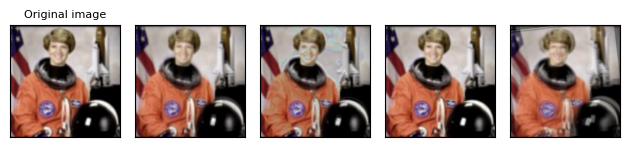

In [ ]:
augmenter = T.AugMix()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

## Randomly-applied transforms 随机应用变换

变换根据概率 p 随机应用，也就是说，变换后的图像可能和原始的一样，即使是用同一个变换器实例调用。

### RandomHorizontalFlip 随机水平翻转

>torchvision.transforms.Pad(*padding*, *fill=0*, *padding_mode='constant'*)
>
>- **p** (*float*) – 图像被水平翻转的概率，默认为 0.5。

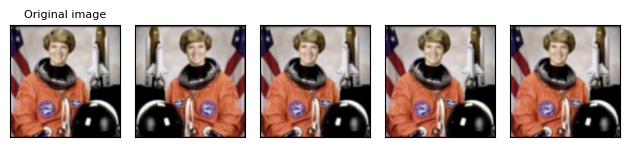

In [ ]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip 随机垂直翻转

>torchvision.transforms.RandomVerticalFlip(*p=0.5*)
>
>- **p** (*float*) –图像被垂直翻转的概率，默认为 0.5。

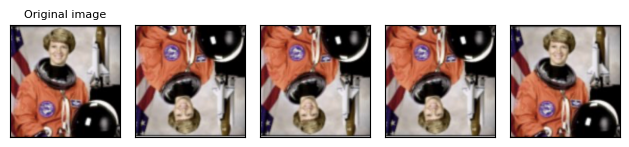

In [ ]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomApply 随机应用所给定的变换

>torchvision.transforms.RandomApply(*transforms*, *p=0.5*)
>
>- **transforms** (*sequence* *or* [*torch.nn.Module*](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)) - 表示要应用的变换列表，可以是一个可调用对象的序列，也可以是一个torch.nn.ModuleList
>- **p** ([*float*](https://docs.python.org/3/library/functions.html#float)) – 表示应用变换的概率，默认为 0.5。

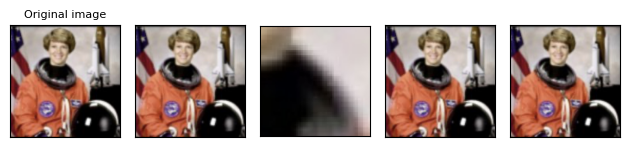

In [ ]:
# 图像有 0.5 的概率应用列表中的所有变换
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomChoice 随机应用所给定的变换之一

>RandomApply 会应用给定列表中的所有变换，你或许只想用其中之一，那么请选择 RandomChoice。
>
>torchvision.transforms.RandomChoice(*transforms*, *p=None*)
>
>- **transforms** (*sequence* *or* [*torch.nn.Module*](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)) - 表示要应用的变换列表，可以是一个可调用对象的序列。
>- **p** (*list of python:floats* *or* *None*, *optional*) – 每个变换被选中的概率，如果 p 的和不为1，则会自动归一化处理，默认为 None，表示选中的概率相同。

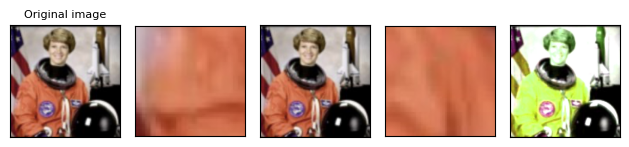

In [ ]:
# 随机应用列表中的变换之一，p=None意味着各变换被选中的概率相同
applier = T.RandomChoice(transforms=[T.RandomCrop(size=(64, 64)), T.ColorJitter(brightness=.5, hue=.3), T.Lambda(lambda x: x)], p=None)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)